In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
dataset = pd.read_csv('C:/Users/Gray/Desktop/dataset/kc_house_data.csv')
dataset.head(30)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
5,7237550310,20140512T000000,1225000.0,4,4.50,5420,101930,1.0,0,0,...,11,3890,1530,2001,0,98053,47.6561,-122.005,4760,101930
6,1321400060,20140627T000000,257500.0,3,2.25,1715,6819,2.0,0,0,...,7,1715,0,1995,0,98003,47.3097,-122.327,2238,6819
7,2008000270,20150115T000000,291850.0,3,1.50,1060,9711,1.0,0,0,...,7,1060,0,1963,0,98198,47.4095,-122.315,1650,9711
8,2414600126,20150415T000000,229500.0,3,1.00,1780,7470,1.0,0,0,...,7,1050,730,1960,0,98146,47.5123,-122.337,1780,8113
9,3793500160,20150312T000000,323000.0,3,2.50,1890,6560,2.0,0,0,...,7,1890,0,2003,0,98038,47.3684,-122.031,2390,7570


In [19]:
X = dataset['sqft_living'].values
Y = dataset['price'].values

In [20]:
#splitting the data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2 ,random_state=6)
#X_train = X_train.reshape(-1, 1)
X_train= X_train.reshape(-1, 1)
Y_train= Y_train.reshape(-1, 1)
X_test = X_test.reshape(-1, 1)
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error
linreg = LinearRegression()
linreg.fit(X_train, Y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [5]:
x_bar = np.mean(X_train)
y_bar = np.mean(Y_train)

m = np.sum(np.dot(X_train-x_bar, Y_train-y_bar))/np.sum((np.dot(X_train-x_bar, X_train-x_bar)))

In [6]:
c = y_bar - m*x_bar

In [7]:
print(m, c)

280.96286397255136 -43610.1961769663


In [8]:
Y_pred = m*X + c

In [21]:
mse = mean_squared_error(Y_test, linreg.predict(X_test))
np.sqrt(mse)

259111.47966159016

In [22]:
linreg.score(X_test,Y_test)

0.498885595595033

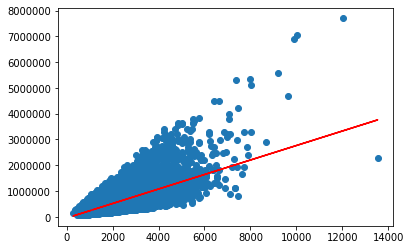

In [23]:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')
plt.show()

In [26]:
R_error = ((Y_pred - y_bar).T@(Y_pred - y_bar)) /((Y - y_bar).T@(Y- y_bar))

In [27]:
print(R_error)

0.4940457385157625
